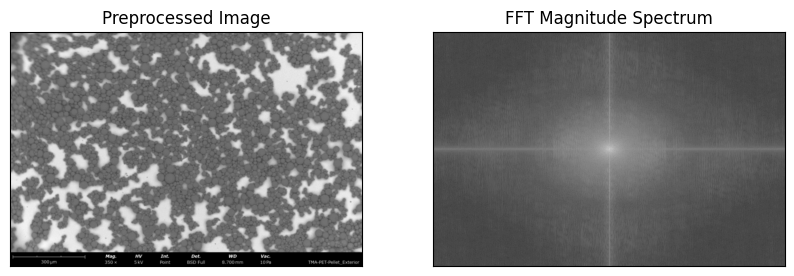

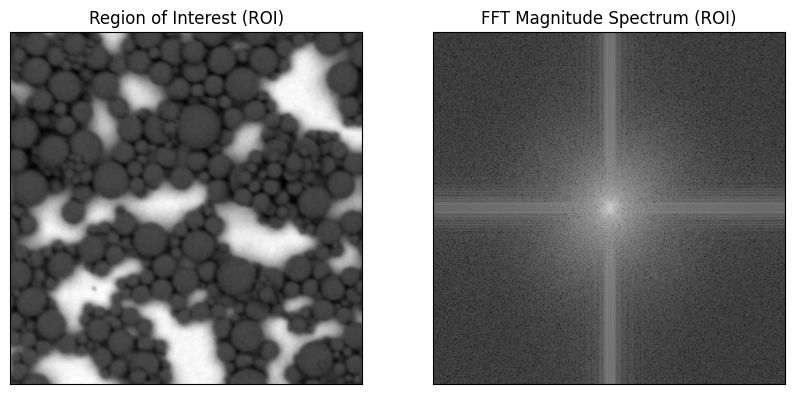

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/workspaces/Python_Physics/Images/PDVB Butanol 4% wt to vol (4).jpeg', 0)  # Update path accordingly

# Apply Gaussian blur to smooth the image
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply additional pre-processing (optional)
# Using morphological transformations to reduce noise and enhance features
kernel = np.ones((3, 3), np.uint8)
preprocessed_image = cv2.morphologyEx(smoothed_image, cv2.MORPH_OPEN, kernel)

# Perform FFT on the preprocessed image
f = np.fft.fft2(preprocessed_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Avoid log(0) errors

# Normalize the magnitude spectrum for better visualization
magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)

# Display the smoothed and preprocessed image and its FFT magnitude spectrum
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(preprocessed_image, cmap='gray')
plt.title('Preprocessed Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Crop a region of interest (ROI) from the image
roi = preprocessed_image[300:700, 300:700]  # Adjust this depending on the area you want to analyze

# Perform FFT on the ROI
f_roi = np.fft.fft2(roi)
fshift_roi = np.fft.fftshift(f_roi)
magnitude_spectrum_roi = 20 * np.log(np.abs(fshift_roi) + 1)  # Avoid log(0)

# Normalize the magnitude spectrum of ROI for better visualization
magnitude_spectrum_roi = cv2.normalize(magnitude_spectrum_roi, None, 0, 255, cv2.NORM_MINMAX)

# Display the ROI and its FFT
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(roi, cmap='gray')
plt.title('Region of Interest (ROI)'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum_roi, cmap='gray')
plt.title('FFT Magnitude Spectrum (ROI)'), plt.xticks([]), plt.yticks([])
plt.show()
